# 1. Evaluate Running Velocity After Cue Onset

In [3]:
import numpy as np
import pandas as pd
import os
from ast import literal_eval
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

Here, I load in previously generated behavior dataframes (generated from FullPipelineCa2_HongliEdits) and collect the running speeds with timestamps within the [-2 s, 2s] window surrounding cue onset. I sort trials by stimulus type (go or no-go) and combine all timestamps in this window from the same stimulus type across animals.

In [ ]:
# this folder contains all late learning sessions
exp_folder = r"\\filenest.diskstation.me\Wilbrecht_file_server\HongliWang\Madeline\LateLearning\Data"

# initialize lists of running speeds and their respective timestamps
ADTgo_speed = []
ADTgo_timestamp = []
ADTnogo_speed = []
ADTnogo_timestamp = []
JUVgo_speed = []
JUVgo_timestamp = []
JUVnogo_speed = []
JUVnogo_timestamp = []

for animal in os.listdir(exp_folder):
    animal_path = os.path.join(exp_folder,animal)
    licks = []
    for session in os.listdir(animal_path):
        session_path = os.path.join(animal_path,session)
        avg_speed = []
        session_licks = []
        if os.path.isdir(os.path.join(session_path,'suite2p')): # make sure we only look at animals with imaging data
            # change directory to behavior folder
            behav_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\Data\{animal}\{session}"
            # load behavior dataframe
            behavior = pd.read_csv(fr"{behav_folder}\{animal}_{session}_behavior_output.csv")
            # this is something I had to google - it properly formats the dataframe from the csv file for columns that contain lists
            behavior[['licks','running_speed','running_time']] = behavior[['licks','running_speed','running_time']].applymap(literal_eval)        
            go = behavior[behavior['go_nogo']=='go']
            nogo = behavior[behavior['go_nogo']=='nogo']
            if 'ADT' in animal:
                for index, trial in go.iterrows():
                    onset_time = trial['onset']
                    # evaluate each time stamp for each running speed data point relative to the trial onset
                    for stamp in range(0,len(trial['running_time'])):
                        # if within [-2, 2] window, add to list. We collect both speed and its timestamp in separate lists
                        if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > -2:
                            ADTgo_speed.append(trial['running_speed'][stamp])
                            ADTgo_timestamp.append(trial['running_time'][stamp] - onset_time)
                for index, trial in nogo.iterrows():
                    onset_time = trial['onset']
                    for stamp in range(0,len(trial['running_time'])):
                        if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > -2:
                            ADTnogo_speed.append(trial['running_speed'][stamp])
                            ADTnogo_timestamp.append(trial['running_time'][stamp] - onset_time)
            if 'JUV' in animal:
                for index, trial in go.iterrows():
                    onset_time = trial['onset']
                    for stamp in range(0,len(trial['running_time'])):
                        if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > -2:
                            JUVgo_speed.append(trial['running_speed'][stamp])
                            JUVgo_timestamp.append(trial['running_time'][stamp] - onset_time)
                for index, trial in nogo.iterrows():
                    onset_time = trial['onset']
                    for stamp in range(0,len(trial['running_time'])):
                        if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > -2:
                            JUVnogo_speed.append(trial['running_speed'][stamp])
                            JUVnogo_timestamp.append(trial['running_time'][stamp] - onset_time)a

Now, we want to arrange all of our collected running speeds in chronological order within the [-2, 2] window! We can do this because each speed is linked to its timestamp by the order in which it was added to the list.

In [ ]:
binsize = 0.1 # group speeds in bins of 100 ms (i.e., [0, 100 ms])

# initialize lists of lists (one list for each bin)
JUVnogo_speeds_sorted = []
JUVgo_speeds_sorted = []
ADTnogo_speeds_sorted = []
ADTgo_speeds_sorted = []

for i in list(np.arange(-2.0, 2.0, binsize)): # for each bin, starting at bin [-2, -1.9 s]
     # identify the list index of each timestamp and add it into a list called "idx"...
    idx = [stamp for stamp in range(len(JUVnogo_timestamp))
           if JUVnogo_timestamp[stamp] > i and JUVnogo_timestamp[stamp] < i+binsize] # only if it falls into the bin
    speeds = [] # temp list
    for x in idx: # for each identified list index of a timestamp within the current bin,
        speeds.append(JUVnogo_speed[x]) # identify the speed sharing the same index and add it to our temp list
    JUVnogo_speeds_sorted.append(speeds) # add the list of speeds for the current bin to our master list

for i in list(np.arange(-2.0, 2.0, binsize)):
    idx = [stamp for stamp in range(len(JUVgo_timestamp)) 
           if JUVgo_timestamp[stamp] > i and JUVgo_timestamp[stamp] < i+binsize]
    speeds = []
    for x in idx:
        speeds.append(JUVgo_speed[x])
    JUVgo_speeds_sorted.append(speeds)

for i in list(np.arange(-2.0, 2.0, binsize)):
    idx = [stamp for stamp in range(len(ADTnogo_timestamp)) 
           if ADTnogo_timestamp[stamp] > i and ADTnogo_timestamp[stamp] < i+binsize]
    speeds = []
    for x in idx:
        speeds.append(ADTnogo_speed[x])
    ADTnogo_speeds_sorted.append(speeds)
    
for i in list(np.arange(-2.0, 2.0, binsize)):
    idx = [stamp for stamp in range(len(ADTgo_timestamp)) 
           if ADTgo_timestamp[stamp] > i and ADTgo_timestamp[stamp] < i+binsize]
    speeds = []
    for x in idx:
        speeds.append(ADTgo_speed[x])
    ADTgo_speeds_sorted.append(speeds)

Now generate and save our plot!

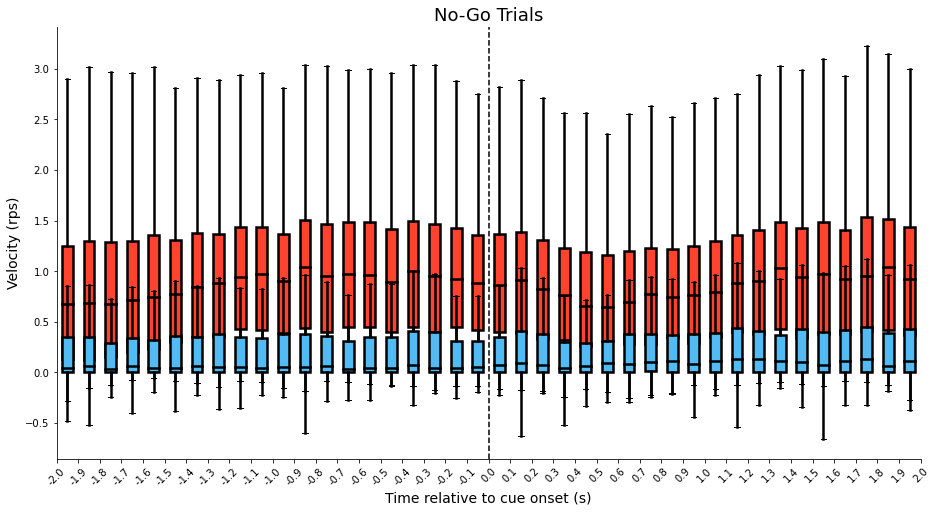

In [21]:
fig = plt.figure(figsize =(12, 6)) 
ax = fig.add_axes([0, 0, 1, 1]) 
bp = ax.boxplot(JUVnogo_speeds_sorted, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="#FF432E",linewidth=2.5), medianprops=dict(color="black",linewidth=2.5), 
            whiskerprops = dict(linewidth=2.5)) 
bp2 = ax.boxplot(ADTnogo_speeds_sorted, showfliers=False, patch_artist=True,
            boxprops=dict(facecolor="#53BBF4",linewidth=2.5), medianprops=dict(color="black",linewidth=2.5), 
            whiskerprops = dict(linewidth=2.5)) 
ax.set_xticks(np.arange(0.5,41.5,1))
ax.set_xticklabels(np.round(np.arange(-2.0,2.1,binsize),2),rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axvline(x=20.5,  linestyle="dashed", color='black')
plt.xlabel('Time relative to cue onset (s)',fontsize=14)
plt.ylabel('Velocity (rps)',fontsize=14)
#plt.ylim([-0.2, 0.5])
plt.title('No-Go Trials',fontsize=18)
plt.savefig(r"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\figures\Fig3C_NogoRunning.svg", format='svg')
plt.show()

# 2. Change in Running Velocity
Does running velocity change after cue onset?

In [ ]:
exp_folder = r"\\filenest.diskstation.me\Wilbrecht_file_server\HongliWang\Madeline\LateLearning\Data"

# initialize lists
# to sort by individual cue, initialize 32 lists: ADTcue1_pre, ADTcue1_post, JUVcue1_pre, JUVcue1_post, etc.
ADTpre_go = []
ADTpost_go = []
JUVpre_go = []
JUVpost_go = []
ADTdelta_go = []
JUVdelta_go = []
ADTpre_nogo = []
ADTpost_nogo = []
JUVpre_nogo = []
JUVpost_nogo = []
ADTdelta_nogo = []
JUVdelta_nogo = []

for animal in os.listdir(exp_folder):
    animal_path = os.path.join(exp_folder,animal)
    for session in os.listdir(animal_path):
        session_path = os.path.join(animal_path,session)
        # to sort by individual cue, initialize 16 lists: cue1_pre, cue1_post, etc.
        go_precue = []
        go_postcue = []
        nogo_precue = []
        nogo_postcue = []
        if os.path.isdir(os.path.join(session_path,'suite2p')):
            print(animal, session)
            behav_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\Data\{animal}\{session}"
            behavior = pd.read_csv(fr"{behav_folder}\{animal}_{session}_behavior_output.csv")
            behavior[['licks','running_speed','running_time']] = behavior[['licks','running_speed','running_time']].applymap(literal_eval)        
            # to sort by individual cue, subset 8 dataframes: cue1 = behavior[behavior['sound_num']==1] etc.
            go = behavior[behavior['go_nogo']=='go']
            nogo = behavior[behavior['go_nogo']=='nogo']
            # # to sort by individual cue, copy and paste the following section and edit as needed for all cues
            for index, trial in go.iterrows():
                onset_time = trial['onset']
                for stamp in range(0,len(trial['running_time'])):
                    if trial['running_time'][stamp] - onset_time < 0 and trial['running_time'][stamp] - onset_time > -2:
                        go_precue.append(trial['running_speed'][stamp])
                    if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > 0:
                        go_postcue.append(trial['running_speed'][stamp])
            for index, trial in nogo.iterrows():
                onset_time = trial['onset']
                for stamp in range(0,len(trial['running_time'])):
                    if trial['running_time'][stamp] - onset_time < 0 and trial['running_time'][stamp] - onset_time > -2:
                        nogo_precue.append(trial['running_speed'][stamp])
                    if trial['running_time'][stamp] - onset_time < 2 and trial['running_time'][stamp] - onset_time > 0:
                        nogo_postcue.append(trial['running_speed'][stamp])
            if 'ADT' in animal or 'TRA' in animal:
                # to sort by individual cue, make sure to append data to all 16 lists:
                ADTpost_go.append(np.mean(go_postcue))
                ADTpost_nogo.append(np.mean(nogo_postcue))
                ADTdelta_go.append(np.mean(go_precue)-np.mean(go_postcue))
                ADTdelta_nogo.append(np.mean(nogo_precue)-np.mean(nogo_postcue))
            if 'JUV' in animal:
                JUVpost_go.append(np.mean(go_postcue))
                JUVpost_nogo.append(np.mean(nogo_postcue))
                JUVdelta_go.append(np.mean(go_precue)-np.mean(go_postcue))
                JUVdelta_nogo.append(np.mean(nogo_precue)-np.mean(nogo_postcue))

We can't calculate statistics with nan values, and one adult session (ADT010-220415, I think) didn't collect running data. So let's remove nans:

In [ ]:
# if sorting by individual cues, make sure to copy and paste this code and edit to account for all cues
ADTdelta_nogo = [x for x in ADTdelta_nogo if str(x) != 'nan']
ADTdelta_go = [x for x in ADTdelta_go if str(x) != 'nan']

print out each list and copy and paste into Prism for analysis/figure generation:

In [ ]:
print(ADTdelta_nogo)
print(ADTdelta_go)
print(JUVdelta_nogo)
print(JUVdelta_go)

To test whether the change in running speed is significantly different from zero (i.e., did speed change between the precue and postcue period?):

In [ ]:
t_statistic, p_value = scipy.stats.ttest_1samp(a=ADTdelta_nogo, popmean=0) 
print("Is adult no-go modulation significantly different from zero?")
print(t_statistic , p_value)
t_statistic, p_value = scipy.stats.ttest_1samp(a=ADTdelta_go, popmean=0) 
print("Is adult go modulation significantly different from zero?")
print(t_statistic , p_value)
t_statistic, p_value = scipy.stats.ttest_1samp(a=JUVdelta_nogo, popmean=0) 
print("Is adolescent no-go modulation significantly different from zero?")
print(t_statistic , p_value)
t_statistic, p_value = scipy.stats.ttest_1samp(a=JUVdelta_go, popmean=0) 
print("Is adolescent go modulation significantly different from zero?")
print(t_statistic , p_value)

Or run a Mann-Whitney U test (because data is not normally distributed) to test whether there are individual differences between cues:

In [ ]:
scipy.stats.mannwhitneyu(JUVdelta_cue5,JUVdelta_cue8)

# 3. Licking Behavior by Previous Trial Type

We wanted to see how the previous trial impacted animals' licking behavior on the current trial, inspired by the Mizrahi lab.

In [1]:
# initialize
exp_folder = r"\\filenest.diskstation.me\Wilbrecht_file_server\HongliWang\Madeline\LateLearning\Data"

JUV_prevhit=[]
JUV_prevCR=[]
JUV_prevFA=[]
JUV_prevmiss=[]

ADT_prevhit=[]
ADT_prevCR=[]
ADT_prevFA=[]
ADT_prevmiss=[]

In [4]:
for animal in os.listdir(exp_folder):
    animal_path = os.path.join(exp_folder,animal)
    animal_prevhit = []
    animal_prevCR = []
    animal_prevFA = []
    animal_prevmiss = [] 
    for session in os.listdir(animal_path):
        session_path = os.path.join(animal_path,session)
        # if only evaluating animals with imaging data, uncomment the line below:
#        if os.path.isdir(os.path.join(session_path,'suite2p')):
        print (animal, session)
        input_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\Data\{animal}\{session}"
        behavior = pd.read_csv(fr"{input_folder}\{animal}_{session}_behavior_output.csv")
        # keep track of the number of previous trial outcomes
        prevhit = 0
        prevCR = 0
        prevFA = 0
        prevmiss = 0
        # keep track of the number of current trials with licking based on the previous trial outcome
        prevhit_lick = 0
        prevCR_lick = 0
        prevFA_lick = 0
        prevmiss_lick = 0
        for index, trial in behavior.iterrows():
            if index > 0: # if this is not the first trial
                prev_trial = behavior.iloc[index-1] # look at the previous trial
                # evaluate the previous trial outcome
                if prev_trial['trialType']==2: # if previous trial was coded as a hit
                    prevhit += 1 # increase count of trials that were hits
                    if trial['licks_out'] > 0: # if animal licked on the current trial
                        prevhit_lick += 1 # increase count of "trials where the previous trial was a hit, and animal licked"
                elif prev_trial['trialType']==0:
                    prevCR += 1
                    if trial['licks_out'] > 0:
                        prevCR_lick += 1
                elif prev_trial['trialType']==-1:
                    prevFA += 1
                    if trial['licks_out'] > 0:
                        prevFA_lick += 1
                elif prev_trial['trialType']==-2:
                    prevmiss += 1 
                    if trial['licks_out'] > 0:
                        prevmiss_lick += 1
        # calculate the fraction of trials where animals licked based on the outcome of the previous trial, 
        # out of the total number of previous trials with that specific outcome
        # all sessions had at least one hit, so we don't need a if/else loop to calculate the fraction for hits
        animal_prevhit.append(prevhit_lick/prevhit)
        if prevCR > 0: # check to make sure there was at least one CR before dividing
            animal_prevCR.append(prevCR_lick/prevCR)  
        else:
            animal_prevCR.append(np.nan)
        if prevFA > 0:
            animal_prevFA.append(prevFA_lick/prevFA)
        else:
            animal_prevFA.append(np.nan)
        if prevmiss > 0:
            animal_prevmiss.append(prevmiss_lick/prevmiss)
        else:
            animal_prevmiss.append(np.nan)
    if 'ADT' in animal and animal_prevhit != []:
        ADT_prevhit.append(animal_prevhit)
        ADT_prevCR.append(animal_prevCR)
        ADT_prevFA.append(animal_prevFA)
        ADT_prevmiss.append(animal_prevmiss)
    if 'TRA' in animal and animal_prevhit != []:
        ADT_prevhit.append(animal_prevhit)
        ADT_prevCR.append(animal_prevCR)
        ADT_prevFA.append(animal_prevFA)
        ADT_prevmiss.append(animal_prevmiss)
    if 'JUV' in animal  and animal_prevhit != []:
        JUV_prevhit.append(animal_prevhit)
        JUV_prevCR.append(animal_prevCR)
        JUV_prevFA.append(animal_prevFA)
        JUV_prevmiss.append(animal_prevmiss)

ADT004 220208
ADT006 220202
ADT006 220203
ADT006 220204
ADT006 220205
ADT008 220418
ADT008 220419
ADT008 220422
ADT009 220415
ADT010 220413
ADT010 220414
ADT010 220415
ADT013 230221
ADT013 230223
ADT013 230224
ADT017 230309
ADT017 230310
ADT017 230312
ADT018 230312
ADT019 230310
ADT019 230311
ADT020 230310
ADT027 231211
ADT027 231212
ADT028 231209
ADT028 231210
ADT028 231211
ADT028 231212
ADT029 231215
JUV010 211211
JUV010 211212
JUV010 211213
JUV010 211214
JUV010 211215
JUV010 211216
JUV010 211217
JUV011 211211
JUV011 211212
JUV011 211213
JUV011 211214
JUV011 211215
JUV011 211216
JUV011 211217
JUV014 220403
JUV014 220404
JUV014 220405
JUV014 220406
JUV014 220407
JUV015 220407
JUV015 220408
JUV015 220409
JUV015 220410
JUV015 220412
JUV016 220406
JUV016 220407
JUV016 220408
JUV016 220409
JUV016 220410
JUV016 220411
JUV016 220412
JUV017 221031
JUV017 221101
JUV017 221102
JUV017 221103
JUV017 221106
JUV017 221107
JUV022 230201
JUV025 230224
JUV025 230301
JUV025 230302
JUV025 230303


The previous cell made lists of lists - one list for each animal. This is useful for keeping track of which session belongs to which animal, but annoying for further analysis. In the cell below, we concatenate these lists of lists.

In [5]:
JUVprevhit = [session for animal in JUV_prevhit for session in animal]
ADTprevhit = [session for animal in ADT_prevhit for session in animal]
JUVprevCR = [session for animal in JUV_prevCR for session in animal]
ADTprevCR = [session for animal in ADT_prevCR for session in animal]
JUVprevFA = [session for animal in JUV_prevFA for session in animal]
ADTprevFA = [session for animal in ADT_prevFA for session in animal]
JUVprevmiss = [session for animal in JUV_prevmiss for session in animal]
ADTprevmiss = [session for animal in ADT_prevmiss for session in animal]

We can't plot with any nans:

In [12]:
# expand to all lists if needed
JUVprevmiss = [x for x in JUVprevmiss if str(x) != 'nan']
ADTprevmiss = [x for x in ADTprevmiss if str(x) != 'nan']

Now plot!

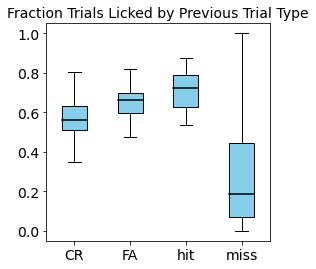

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

JUV = [JUVprevCR, JUVprevFA, JUVprevhit, JUVprevmiss]
ADT = [ADTprevCR, ADTprevFA, ADTprevhit, ADTprevmiss]
fig = plt.figure(figsize=(4,4))
ax  = fig.add_subplot(111)
labels=['CR','FA','hit','miss']
bplot = ax.boxplot(JUV, labels=labels, patch_artist=True, showfliers=False,
                   medianprops = dict(color = "black", linewidth = 1.5))
plt.setp(bplot["boxes"], facecolor='skyblue')
ax.set_title('Fraction Trials Licked by Previous Trial Type', fontsize=14)
ax.tick_params(labelsize=14)

We can also print out each list to copy and paste it into Prism for additional analysis and plotting:

In [ ]:
print("ADT:")
print("hit: ", ADTprevhit)
print("FA: ", ADTprevFA)
print("CR: ", ADTprevCR)
print("miss: ", ADTprevmiss)
print("JUV:")
print("hit: ", JUVprevhit)
print("FA: ", JUVprevFA)
print("CR: ",JUVprevCR)
print("miss: ", JUVprevmiss)

We can run individual Mann-Whitney U tests here, if we're curious, or we can do that in Prism too.

In [ ]:
scipy.stats.mannwhitneyu(ADTprevmiss,JUVprevmiss)

# 4. Counting Fractions of Trials by Outcome

Here's the code I used to report the fractions of trial outcomes for adults and adolescents:

In [19]:
exp_folder = r"\\filenest.diskstation.me\Wilbrecht_file_server\HongliWang\Madeline\LateLearning\Data"

ADThit = []
ADTFA = []
ADTCR = []
ADTmiss = []
JUVhit = []
JUVFA = []
JUVCR = []
JUVmiss = []
ADTtrials = 0
JUVtrials = 0

for animal in os.listdir(exp_folder):
    animal_path = os.path.join(exp_folder,animal)
    for session in os.listdir(animal_path):
        session_path = os.path.join(animal_path,session)
        input_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\Data\{animal}\{session}"
        behavior = pd.read_csv(fr"{input_folder}\{animal}_{session}_behavior_output.csv")
        hit = 0
        CR = 0
        FA = 0
        miss = 0
        for index, trial in behavior.iterrows():
            if trial['trialType']==2:
                hit += 1
            elif trial['trialType']==0:
                CR += 1
            elif trial['trialType']==-1:
                FA += 1
            elif trial['trialType']==-2:
                miss += 1 
        if 'ADT' in animal or 'TRA' in animal:
            ADThit.append(hit/behavior.shape[0])
            ADTCR.append(CR/behavior.shape[0])
            ADTFA.append(FA/behavior.shape[0])
            ADTmiss.append(miss/behavior.shape[0])
            ADTtrials += behavior.shape[0]
        if 'JUV' in animal:
            JUVhit.append(hit/behavior.shape[0])
            JUVCR.append(CR/behavior.shape[0])
            JUVFA.append(FA/behavior.shape[0])
            JUVmiss.append(miss/behavior.shape[0])
            JUVtrials += behavior.shape[0]

In [37]:
# print out here to report stats in paper
print('total JUV trials: ', JUVtrials)
print('JUV hit %: ', round(np.mean(JUVhit)*100,1))
print('JUV hit SEM %: ', round(scipy.stats.sem(JUVhit)*100,1))

total JUV trials:  18070
JUV hit %:  45.0
JUV hit SEM %:  0.6


I was also curious when in each session miss trials occured, so here I collect the trial number of each miss trial for all adults and adolescents and normalize it to the total number of trials to find out when in the session each miss occurred:

In [147]:
exp_folder = r"\\filenest.diskstation.me\Wilbrecht_file_server\HongliWang\Madeline\LateLearning\Data"

ADTmisstrials = []
JUVmisstrials = []

for animal in os.listdir(exp_folder):
    animal_path = os.path.join(exp_folder,animal)
    for session in os.listdir(animal_path):
        session_path = os.path.join(animal_path,session)
        input_folder = fr"\\filenest.diskstation.me\Wilbrecht_file_server\Madeline\processed_data\Data\{animal}\{session}"
        behavior = pd.read_csv(fr"{input_folder}\{animal}_{session}_behavior_output.csv")
        for index, trial in behavior.iterrows():
            if trial['trialType']==-2:    
                if 'ADT' in animal or 'TRA' in animal:
                    ADTmisstrials.append(index/behavior.shape[0])
                if 'JUV' in animal:
                    JUVmisstrials.append(index/behavior.shape[0])

Text(0.5, 1.0, 'Miss Trials Over Session')

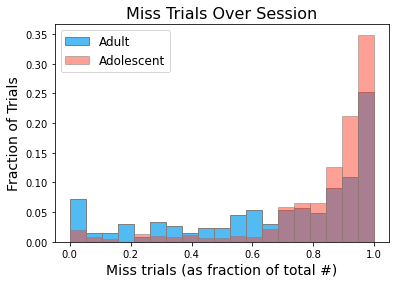

In [159]:
lickfreq_bins = np.linspace(0,1,20)
JUVweight = np.ones_like(JUVmisstrials) / len(JUVmisstrials)
ADTweight = np.ones_like(ADTmisstrials) / len(ADTmisstrials)
plt.hist(ADTmisstrials, bins=lickfreq_bins, weights=ADTweight, color="#53BBF4", ec='gray', alpha=1, label='Adult')
plt.hist(JUVmisstrials, bins=lickfreq_bins, weights=JUVweight, color="#FF432E", ec='gray', alpha=0.5, label='Adolescent')
plt.legend(loc='upper left',prop={'size': 12})
plt.xlabel('Miss trials (as fraction of total #)',fontsize=14)
plt.ylabel('Fraction of Trials',fontsize=14)
plt.title('Miss Trials Over Session',fontsize=16)
#stat, pval = scipy.stats.mannwhitneyu(ADTavg_numlicks_go,ADTavg_numlicks_nogo)
#plt.text(9, 0.3, "p = " + str(pval), fontsize = 12)